In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
import warnings

warnings.filterwarnings("ignore")

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# 基于随机梯度下降算法的波士顿房价预测

## 一、导入数据集

In [135]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [136]:
columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptradio','b','lstat']
house_df = pd.DataFrame(data=data, columns=columns)

In [137]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptradio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [138]:
house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptradio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 二、划分数据集

In [139]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=46, random_state=10)

In [140]:
display(X_train.shape, X_test.shape)

(460, 13)

(46, 13)

In [141]:
display(y_train.shape, y_test.shape)

(460,)

(46,)

## 三、数据预处理（标准化）

In [142]:
std_scaler = StandardScaler()

In [143]:
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

## 四、随机梯度下降

In [144]:
sgd = SGDRegressor()

In [145]:
sgd.fit(X_train_std, y_train)

SGDRegressor()

In [146]:
y_pred = sgd.predict(X_test_std)

In [147]:
sgd.score(X_test_std, y_test)

0.51614272538626

In [148]:
b = sgd.intercept_
b

array([22.14990949])

In [149]:
w = sgd.coef_
w

array([-0.9213357 ,  1.13331901, -0.24061344,  0.83007499, -1.68635677,
        2.60873369, -0.09933997, -3.08815304,  1.91317524, -1.24483052,
       -1.7894394 ,  0.99989448, -3.73862047])

## 五、特征筛选

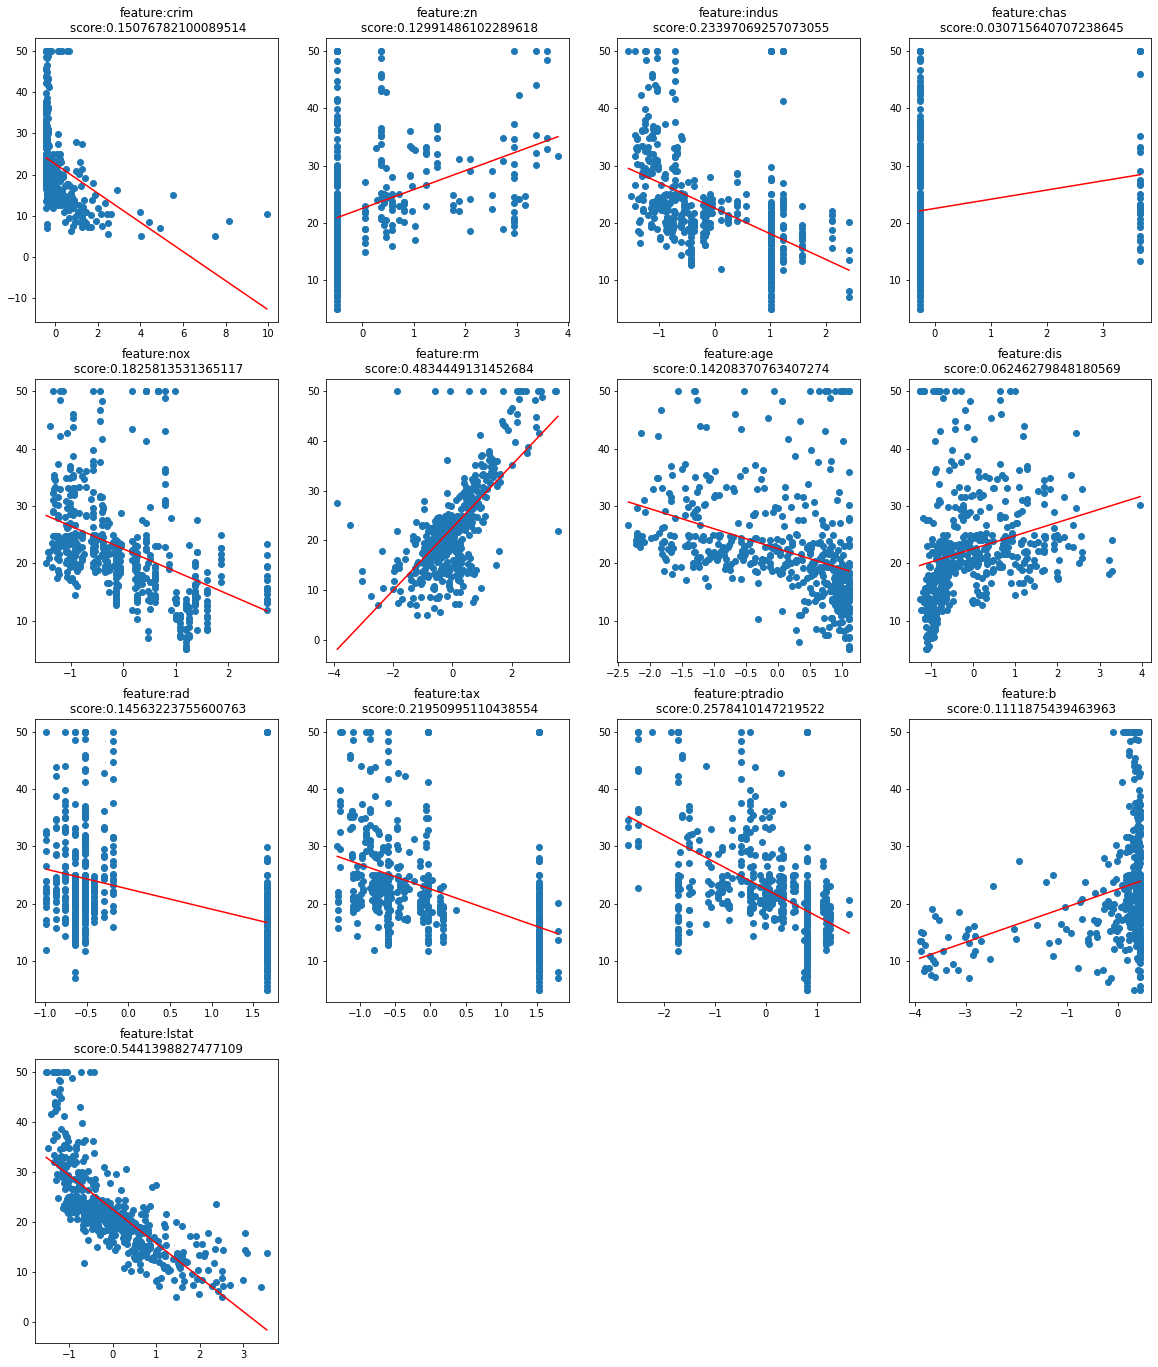

In [150]:
plt.figure(figsize=(4*5, 4*6))

for i, col in enumerate(columns, 1):
    X_train = house_df[[col]].values
    std_scaler = StandardScaler()
    X_train_std = std_scaler.fit_transform(X_train)
    
    sgd = SGDRegressor()
    sgd.fit(X_train_std, target)

    X_test = np.linspace(X_train_std.min(), X_train_std.max(), num=100).reshape(-1, 1)
    y_pred = sgd.predict(X_test)
    score = sgd.score(X_train_std, target)

    axes = plt.subplot(4, 4, i)
    axes.scatter(X_train_std, target)
    axes.plot(X_test, y_pred, c='r')
    axes.set_title(f'feature:{col}\n score:{score}')

## 六、随机梯度下降（手写）

In [182]:
# 复制数据集data，将其赋值给变量X
X = data.copy()
# 复制目标变量target，将其赋值给变量y
y = target.copy()

# 创建一个StandardScaler对象，用于数据标准化
scaler = StandardScaler()
# 使用StandardScaler对象对数据X进行标准化处理
X = scaler.fit_transform(X)

# 使用numpy库的concatenate函数，将全1数组（形状为(506,1)）与X进行横向拼接，并将结果赋值给X
X = np.concatenate((X, np.ones(shape=(X.shape[0],1))),axis=1)

In [183]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  1.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937,  1.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  1.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163,  1.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833,  1.        ]])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=46, random_state=10)

In [173]:
X_train.shape

(460, 14)

In [174]:
y_train.shape

(460,)

In [175]:
# 初始化参数theta，催记生成14行1列的数组
theta = np.random.randn(14, 1)

In [176]:
# 设置学习率调整参数t0和t1
t0 = 1
t1 = 1000

In [177]:
# 初始化迭代次数epoch
epoch = 0

In [178]:
# 定义学习率调整函数
def learn(epoch):
    return t0 / (epoch + t1)  # 轮次越大，学习率越小，步子就越小

In [179]:
# 初始化损失loss和上一轮损失lass_loss
loss = 0
last_loss = 1

In [180]:
# 进行2000次迭代
for epoch in range(1, 2001):
    # 如果损失值变化小于 1e-7,则提前终止迭代
    if np.abs(loss - last_loss) < 1e-7:
        break
    # 随机选择一个样本
    index = np.random.randint(0, X_train.shape[0], 1)[0]
    X_i = X_train[[index]]
    y_i = y_train[[index]]
    # 计算梯度grid
    grid = X_i.T.dot(X_i.dot(theta) - y_i)
    # 计算学习率
    eta = learn(0)
    # 更新参数theta
    theta = theta - eta*grid
    # 更新损失值
    last_loss = loss
    # 计算当前损失
    loss = ((X_train.dot(theta) - y_train.reshape(X_train.shape[0], 1))**2).sum()
 
    if epoch % 100 == 0:
        print(f'epoch:{epoch} \t loss:{loss}')

epoch:100 	 loss:195885.53194221223
epoch:200 	 loss:162092.00807846873
epoch:300 	 loss:138107.25932531746
epoch:400 	 loss:116705.4312018365
epoch:500 	 loss:98896.74651577167
epoch:600 	 loss:82435.34557313989
epoch:700 	 loss:69377.49483287934
epoch:800 	 loss:58824.65682508755
epoch:900 	 loss:50566.6728596904
epoch:1000 	 loss:42342.10372198596
epoch:1100 	 loss:36822.93201287159
epoch:1200 	 loss:31466.912274004433
epoch:1300 	 loss:28198.649911528857
epoch:1400 	 loss:25082.10720351905
epoch:1500 	 loss:21903.493932012352
epoch:1600 	 loss:19755.50400287714
epoch:1700 	 loss:18490.343591685614
epoch:1800 	 loss:17567.3422876001
epoch:1900 	 loss:16404.719389693964
epoch:2000 	 loss:15575.793622894682
